## Pearson Correlation

This notebook is for experimentation with Pearson Correlation

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as scipy
import scipy.stats as stats

Here all the column headers are listed, simply for reference

In [25]:
dat = pd.read_csv("../data/cpu.csv")
print(list(dat))

['vendor', 'model', 'myct', 'mmin', 'mmax', 'cach', 'chmin', 'chmax', 'prp', 'erp']


Next a simple scatterplot is created from the columns PRP and MMAX

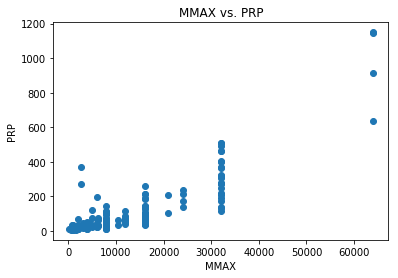

In [26]:
plt.scatter(x='mmax', y='prp', data=dat)
plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.title('MMAX vs. PRP')
plt.show()
plt.show()

A scipy array is made using the two columns, and then scipy peasron is run using the two columns.

In [27]:
x = scipy.array(dat['mmax'])
y = scipy.array(dat['prp'])
r, p = scipy.stats.pearsonr(x,y)
print("R value is:", r)
print("P value is:", p)

R value is: 0.8630041243651342
P value is: 2.6488889977496055e-63


Next I'm finding the R and P value using the linregress() function of SciPy, which will also provide a slope and x intercept so that a line can be fi to the data.

In [28]:
slope, intercept, r, p, error = scipy.stats.linregress(x,y)
line = slope * x + intercept
print("R value is:", r)
print("P value is:", p)

R value is: 0.8630041243651343
P value is: 2.648888997749387e-63


The R and P values are almost identical.
Next, I plot the scatterplot again, but this time with the linear regression line added.

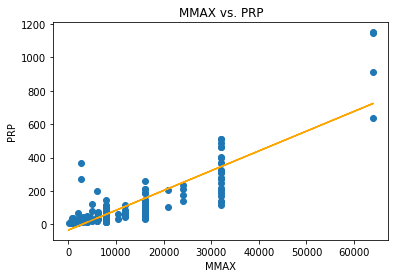

In [29]:
plt.plot(x, y, "o")
plt.plot(x, line, color='orange')
plt.xlabel('MMAX')
plt.ylabel('PRP')
plt.title('MMAX vs. PRP')
plt.show()

Next, I'll create a function that takes a dataframe, and two column names, and plots a plot like above, for the given columns.

In [30]:
def plot_pearson(data, x_name, y_name, title=None, xlab=None, ylab=None):
    if not title:
        title = x_name + " vs. " + y_name
    if not xlab:
        xlab = x_name
    if not ylab:
        ylab = y_name
    x = scipy.array(data[x_name])
    y = scipy.array(data[y_name])
    slope, intercept, r, p, error = scipy.stats.linregress(x,y)
    line = slope * x + intercept
    plt.scatter(x, y)
    plt.plot(x, line, color='orange')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.show()
    return r

Let's test the function.

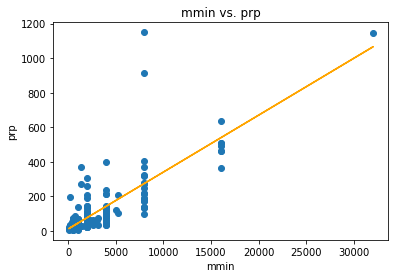

R score is:  0.7949313405266915


In [31]:
r = plot_pearson(dat, "mmin", "prp")
print("R score is: ", r)